In [1]:
import json
import glob
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import folium
import matplotlib

# 2.0 Parsing, Processing, Visualing Data

## 2.1 Import and Merge Data, JSON

In [2]:
def OpenJson(path):
    json_file = open(path, "r")
    json_str = json_file.read()
    json_data = json.loads(json_str)
    return json_data

In [3]:
THE_PATH = "data/raw/Boston/"
path = glob.glob(THE_PATH + "*.json") # loads all third place data

In [9]:
dataDic = {}

for i in path:
    DATA_DIC = OpenJson(i)
    if len(DATA_DIC) == 0:
        DATA_DIC = [{
            "lat": 0,
            "lon": -0
        }]
    thirdPlaceName = (i.split('/')[-1].split('.')[0]) # Class from third place names

    classList = []
    for i in DATA_DIC:
        if i not in classList:
            classList.append(i)

    dataDic[thirdPlaceName] = classList

In [10]:
print(dataDic['zoo'])

[{'lat': 42.3838936, 'lon': -71.11767309999999, 'type': 'zoo'}, {'lat': 42.4616785, 'lon': -71.0931683, 'type': 'zoo'}, {'lat': 42.4623344, 'lon': -71.09394189999999, 'type': 'zoo'}, {'lat': 42.4622632, 'lon': -71.09360819999999, 'type': 'zoo'}, {'lat': 42.4627074, 'lon': -71.09449219999999, 'type': 'zoo'}, {'lat': 42.4627597, 'lon': -71.09392129999999, 'type': 'zoo'}, {'lat': 42.4627581, 'lon': -71.093836, 'type': 'zoo'}, {'lat': 42.4629576, 'lon': -71.09430429999999, 'type': 'zoo'}, {'lat': 42.4630206, 'lon': -71.0930463, 'type': 'zoo'}, {'lat': 42.4639037, 'lon': -71.09367499999999, 'type': 'zoo'}, {'lat': 42.4638429, 'lon': -71.0928753, 'type': 'zoo'}, {'lat': 42.3069531, 'lon': -71.0904217, 'type': 'zoo'}, {'lat': 42.3063937, 'lon': -71.0907604, 'type': 'zoo'}, {'lat': 42.3054729, 'lon': -71.0908192, 'type': 'zoo'}, {'lat': 42.3051206, 'lon': -71.08976950000002, 'type': 'zoo'}, {'lat': 42.3050347, 'lon': -71.08897329999999, 'type': 'zoo'}, {'lat': 42.3046511, 'lon': -71.0894452000

In [11]:
def SaveJson(path, d):
    with open(path, "w") as writeJSON:
        json.dump(d, writeJSON, ensure_ascii=False, indent=4)
        
SaveJson('./data/raw/google-third-place-Boston.json', dataDic) # save dictionary data as a JSON object

## 2.2 Processing Data, CSV

In [12]:
table = []

for i in dataDic:
    for j in dataDic[i]:
        table.append([j["lat"], j["lon"], i])

print(table[:10])

[[42.3966626, -71.129677, 'beauty_salon'], [42.397739, -71.1217156, 'beauty_salon'], [42.387274, -71.1186, 'beauty_salon'], [42.3837522, -71.1343519, 'beauty_salon'], [42.3836266, -71.1102457, 'beauty_salon'], [42.3964757, -71.1039164, 'beauty_salon'], [42.3989643, -71.10232789999999, 'beauty_salon'], [42.4095519, -71.10993820000002, 'beauty_salon'], [42.3914818, -71.0994339, 'beauty_salon'], [42.4119744, -71.1440657, 'beauty_salon']]


In [13]:
# generate CSV
def SaveData(path, data):		
    text_file = open(path, "w")
    for d in data:
        myStr = ""
        for j in d:
            myStr += str(j) + ","
        myStr = myStr[:-1] + '\n'
        text_file.write(myStr)
        # break
    text_file.close()

SaveData('./data/raw/google-third-place-Boston.csv', table)

In [14]:
def SavePandasToCSV(path,d):
    d.to_csv(path, index=False, header=False, sep=',', encoding='utf-8')
    return "done!!"

path = './data/raw/google-third-place-Boston_df.csv'
SavePandasToCSV(path, pd.DataFrame(table))

'done!!'

## 2.3 Visualization

In [15]:
CLASS_LIST = []

for i in dataDic:
    if i not in CLASS_LIST:
        CLASS_LIST.append(i)

print(len(CLASS_LIST))
print(CLASS_LIST)


import random
COLOR_LIST = []
for i in CLASS_LIST:
    r = random.random()
    g = random.random()
    b = random.random()
    COLOR_LIST.append((r,g,b, 0.2))

print(COLOR_LIST)

95
['beauty_salon', 'campground', 'stadium', 'airport', 'car_rental', 'locksmith', 'embassy', 'cafe', 'laundry', 'aquarium', 'convenience_store', 'moving_company', 'car_wash', 'bus_station', 'rv_park', 'dentist', 'shopping_mall', 'hospital', 'store', 'car_dealer', 'home_goods_store', 'grocery_or_supermarket', 'restaurant', 'bank', 'painter', 'insurance_agency', 'health', 'post_office', 'department_store', 'city_hall', 'parking', 'night_club', 'car_repair', 'bowling_alley', 'bicycle_store', 'veterinary_care', 'subway_station', 'synagogue', 'liquor_store', 'local_government_office', 'roofing_contractor', 'shoe_store', 'florist', 'train_station', 'food', 'art_gallery', 'hindu_temple', 'travel_agency', 'gym', 'electrician', 'doctor', 'accounting', 'amusement_park', 'movie_theater', 'bar', 'atm', 'taxi_stand', 'electronics_store', 'church', 'pet_storepharmacy', 'library', 'book_store', 'cemetery', 'general_contractor', 'funeral_home', 'clothing_store', 'mosque', 'gas_station', 'police', 'lo

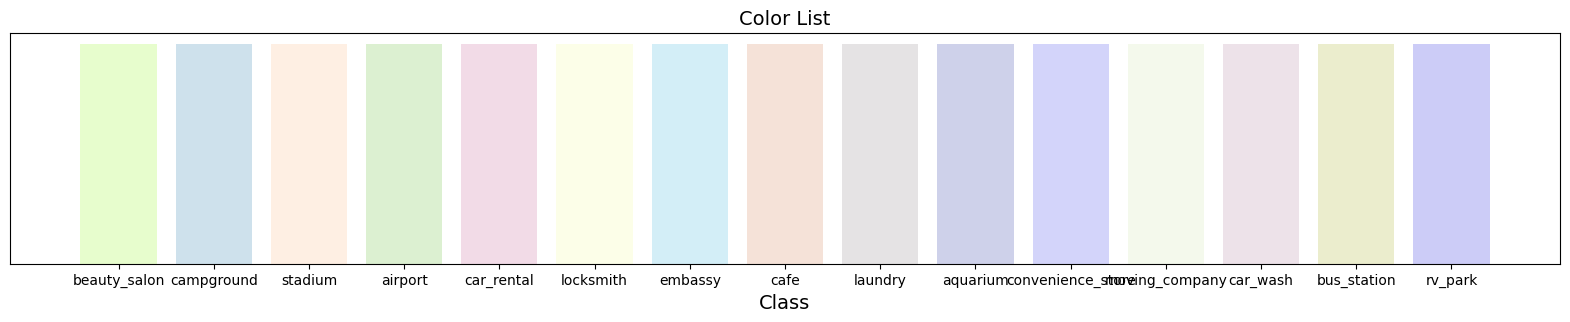

In [16]:
maxIndex = 15

Country = CLASS_LIST[:maxIndex]
New_Colors = COLOR_LIST[:maxIndex]
GDP_Per_Capita = [ 1 for i in range(len(COLOR_LIST[:maxIndex])) ]

plt.figure(figsize=(20, 3))
plt.bar(Country, GDP_Per_Capita, color=New_Colors)
plt.title('Color List', fontsize=14)
plt.xlabel('Class', fontsize=14)
plt.yticks([])
plt.show()

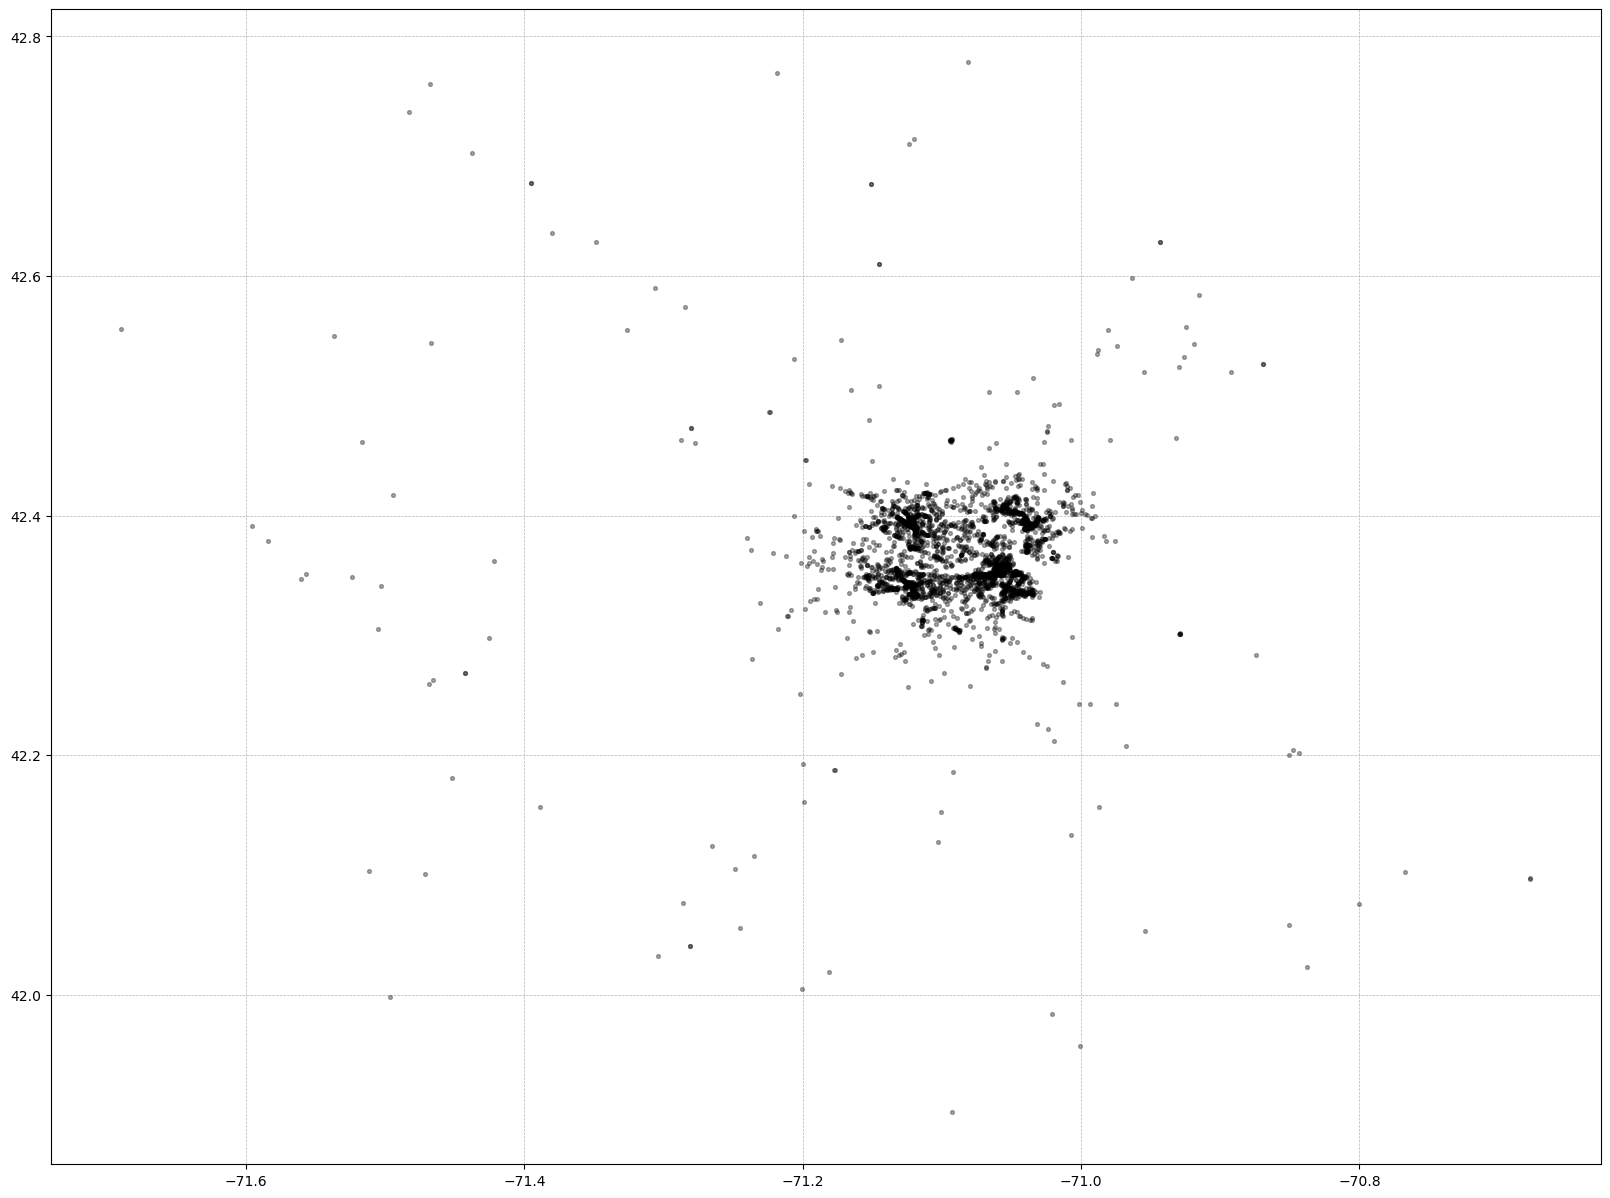

In [17]:
x = []
y = []
c = []

for i in dataDic:
    colorIndex = CLASS_LIST.index(i)
    # print(i)
    for pos in dataDic[i]:
        if (pos['lat'] != 0):
            x.append(pos['lat'])
            y.append(pos['lon'])
            c.append(COLOR_LIST[colorIndex])
        
plt.figure(figsize=(20,15))
plt.grid(linestyle='--', linewidth=0.5, alpha=0.95)
plt.plot(y, x, 'o', markersize = 2.758, color = [0, 0, 0, 0.33] )

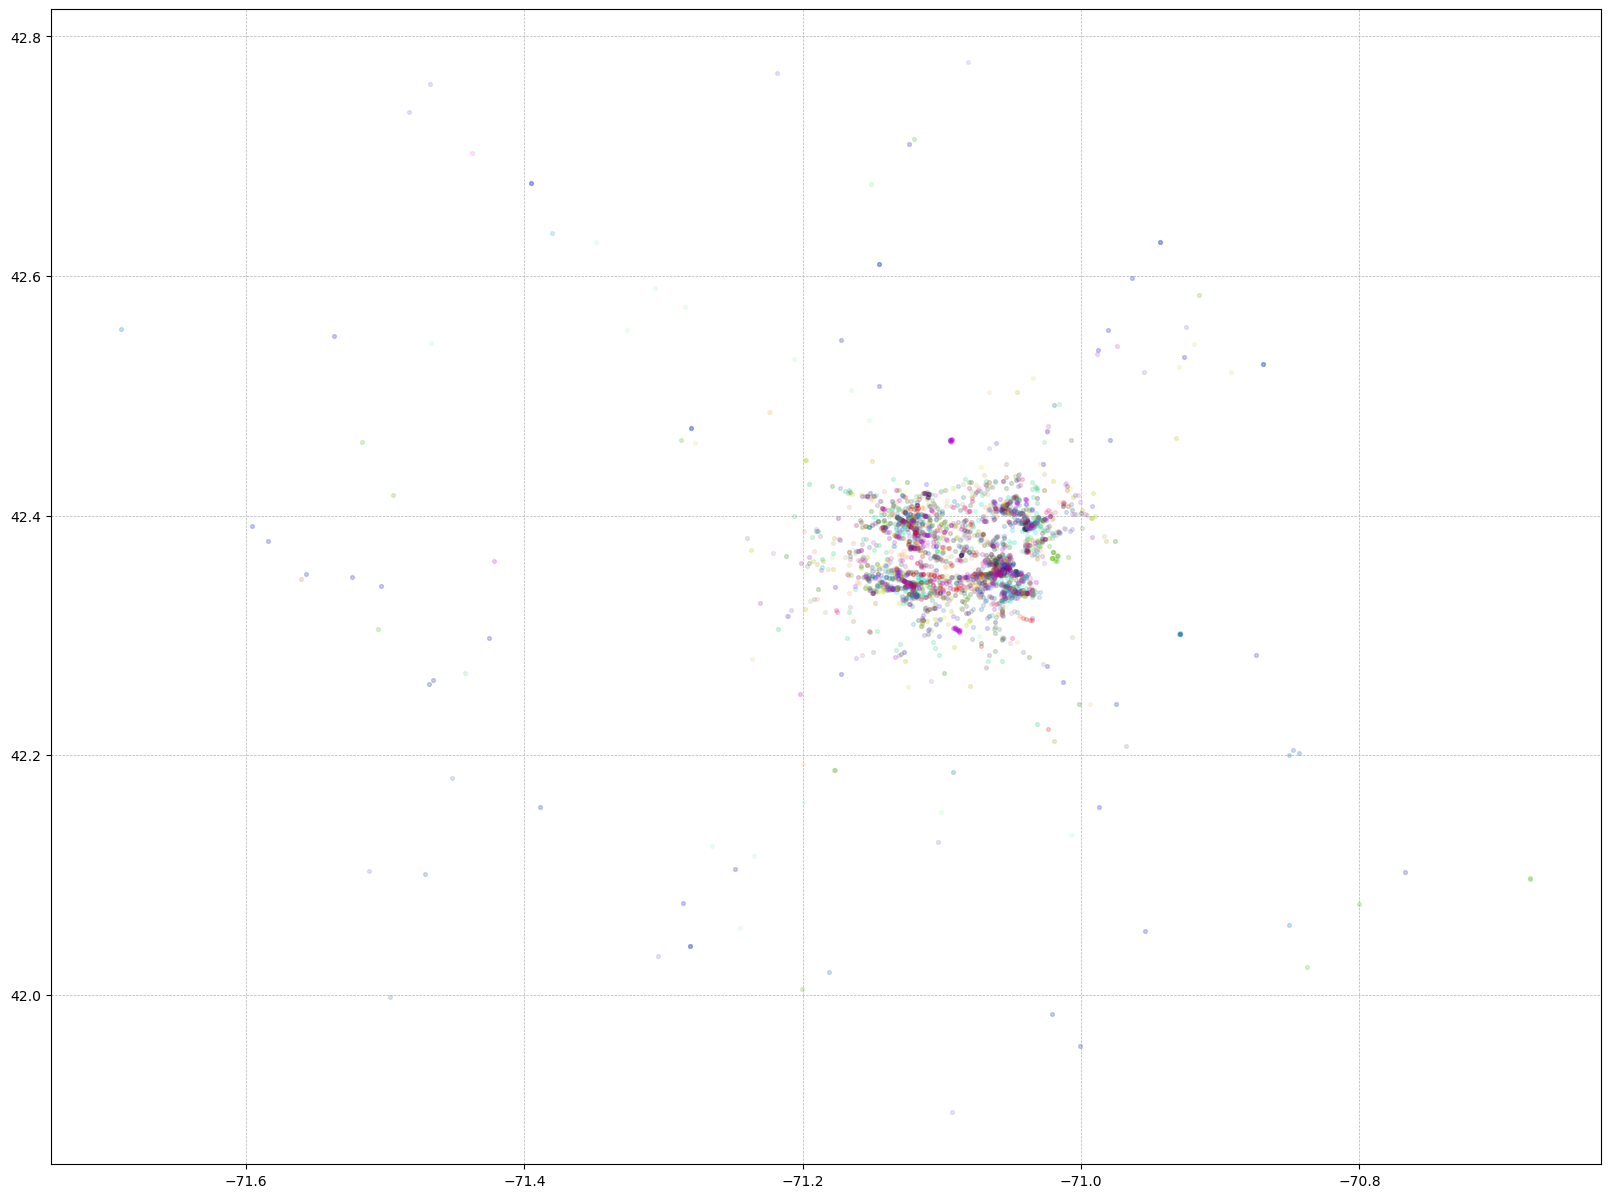

In [18]:
plt.figure(figsize=(20,15))
plt.grid(linestyle='--', linewidth=0.5, alpha=0.95)
for id in range(len(x)):
    plt.plot(y[id], x[id], 'o', markersize = 2.758, color = c[id] )

In [19]:
min = [180, 180]
max = [-180, -180]

for i in dataDic:
    for pos in dataDic[i]:
        if (pos['lat'] != 0):
            if pos['lat'] < min[0]:
                min[0] = pos['lat']
            if pos['lon'] < min[1]:
                min[1] = pos['lon']
            if pos['lat'] > max[0]:
                max[0] = pos['lat']
            if pos['lon'] > max[1]:
                max[1] = pos['lon'] 

centerLat = min[0] + ((max[0] - min[0]) * 0.5)
centerLon = min[1] + ((max[1] - min[1]) * 0.5)

print(centerLat, centerLon)

42.340544550000004 -71.18350314999999


In [1]:
map = folium.Map(location=[centerLat, centerLon], zoom_start=14, width="100%", height="100%")
# map = folium.Map(location=[centerLat, centerLon], tiles="CartoDB dark_matter", zoom_start=14, width="100%", height="100%")

for i in dataDic:
    count = 0
    for pos in dataDic[i]:
        if (pos['lat'] == 0):
            continue
        # print(i)

        cIndex = CLASS_LIST.index(i)
        # print(cIndex)
        c = COLOR_LIST[cIndex]
        # print(c)
        hex = matplotlib.colors.to_hex(c)
        # print(hex)

        folium.Marker(
            [pos['lat'], pos['lon']], 
            popup=i, 
            icon = folium.Icon(
                icon_color=hex,
                color='gray',
                # size="small"
                )).add_to(map)

        count += 1
        if (count > 10) :
            break
map

NameError: name 'folium' is not defined